<a href="https://colab.research.google.com/github/AISaturdaysLagos/cohort7_organization/blob/issue-8-Industrial_Strength_Visualization_libraries_Tutorial_and_Task/data_visualization/Year_2020_World_Population_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    
<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 7</font></h1>   

   
<h2 align=center><font size = 6>DATA VISUALIZATION PRACTICAL</font></h2><br>
  
  

<h3 align=center><font size = 3>(PROJECT: Story Telling on 2020 World Population by Country) </font></h3>


<h5 align=center><font size = 2>Data Source: UN Data.</font></h5>

In [ ]:
import numpy as np              # numerical operations
import pandas as pd             # data preprocessing

import matplotlib.pyplot as plt # data visualization with matplotlib
import seaborn as sns           # data visualization with seaborn

In [ ]:
# Load Data
worldData = pd.read_csv("/content/population_by_country_2020.csv")
worldData.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


- Country(or dependency): Country/Dependent Territories
- Population (2020): Country's Population as at 2020
- Yearly change: Yearly change in population over time in Percentage
- Net Change: Total yearly change
- Density: Population Density in a unit area
- Land Area: Country's Land Area
- Migrants: The number of people leaving a country compared to those entering the country. A negative value shows more people leave the country then those that come in.
- Fert Rate: Country's Fertility rate
- Med Age: Median Age in the country
- Urban Pop%: Percentage Population in the Urban areas
- World share%: Percentage of the world's population the country's population covers.

In [ ]:
# check the shape of the data
worldData.shape

(235, 11)

In [ ]:
worldData.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

____________________________________________________________

__The focus of this practical is on data visualization and story telling.__

Data visualization is simply creating a pictorial view of your data, so as to understand it better. The end goal of visualization is story telling.

But before embarking on all these, it's important to ensure that the data is clean and ready to be visualized. 

We will look at how to clean the [2020 Population of Countries](https://www.worldometers.info/world-population/population-by-country/) data.

However, it's important to understand data types, as they will guide your decisions on what type of plot to use and what could be your __x__ and __y__ values.

- Categorical: These are features where the data samples are limited to belonging to a group. `There is no categorical column in our data` 
- Numerical: These are columns (features) with values that are either integers or floats.
- Objects: These are columns with values that are strings.

Objects have some sorta restraints to data visualization unlike the flexibilty numerical features offer. 

Sometimes, it's important to convert the object data types to numericals. For example, using encoders, values or simply changing the data type (if it was alpha-numeric).

In [ ]:
worldData.dtypes

Country (or dependency)     object
Population (2020)            int64
Yearly Change               object
Net Change                   int64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)             float64
Fert. Rate                  object
Med. Age                    object
Urban Pop %                 object
World Share                 object
dtype: object

## __Now, let's get started!__


### Change Data Types
 
Take a look at the data, are there columns that we need to change their data types?

- Yearly Change (%)
- Fert. Rate
- Med. Age
- Urban Population (%)
- World Share (%)

## Data Cleaning:


In [ ]:
data = worldData.copy()

In [ ]:
# Remove the '%' in the three columns having one and convert to numerical data type
worldData['Yearly Change'] = worldData['Yearly Change'].map(lambda x: x.rstrip('% ')).astype(float)
worldData['Urban Pop %'] = worldData['Urban Pop %'].map(lambda x: x.rstrip('% ')).astype(int)
worldData['World Share'] = worldData['World Share'].map(lambda x: x.rstrip('% ')).astype(float)

worldData['Fert. Rate'] = worldData['Fert. Rate'].astype(float)
worldData['Med. Age'] = worldData['Med. Age'].astype(int)

ValueError: ignored

__Oops!__ Seems we have null values in our data, identified as 'N.A.'

In [ ]:
# identify  possible "?" and 'NaN', and "N.A" in the dataset
worldData[worldData.eq("N.A.").any(1)]

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
49,Venezuela,28451828,-0.28,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
103,Hong Kong,7484618,0.82,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
113,Singapore,5840996,0.79,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
128,Kuwait,4257495,1.51,63488,240,17820,39520.0,2.1,37,N.A.,0.05 %
140,Puerto Rico,2874636,-2.47,-72555,323,8870,-97986.0,1.2,44,N.A.,0.04 %
166,Macao,647508,1.39,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
175,Guadeloupe,400110,0.02,68,237,1690,-1440.0,2.2,44,N.A.,0.01 %
201,Isle of Man,84942,0.53,449,149,570,NaN,N.A.,N.A.,53 %,0.00 %
202,Andorra,77240,0.16,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
203,Dominica,71950,0.25,178,96,750,NaN,N.A.,N.A.,74 %,0.00 %


In [ ]:
# Replace 'N.A.' in Fert. Rate, Med. Age and Urban Pop %, with NaN
worldData['Fert. Rate'] = worldData['Fert. Rate'].replace("N.A.", np.nan)
worldData['Med. Age'] = worldData['Med. Age'].replace("N.A.", np.nan)
worldData['Urban Pop %'] = worldData['Urban Pop %'].replace("N.A.", np.nan)

In [ ]:
worldData.isnull().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

From the dataframe above, we can see that the countries with missing information on their Migrants, Fertility Rate and Median Age are Dependent Territories. Therefore, it could be safe to drop these 34 territories and focus on the remaining samples, which are mainly countries.

Before that, we'll fill the null values in the Urban Population first.

In [ ]:
worldData.describe(include='all')

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,235,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201,201,222,235
unique,235,NaN,NaN,NaN,NaN,NaN,NaN,50,34,80,74
top,Syria,NaN,NaN,NaN,NaN,NaN,NaN,1.8,19,88 %,0.00 %
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,14,14,7,57
mean,NaN,3.309773e+07,1.104553,3.460878e+05,475.770213,5.535918e+05,6.283582,NaN,NaN,NaN,NaN
std,NaN,1.349417e+08,1.075647,1.128260e+06,2331.285935,1.687796e+06,123291.887548,NaN,NaN,NaN,NaN
min,NaN,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,NaN,NaN,NaN,NaN
25%,NaN,3.981150e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-10047.000000,NaN,NaN,NaN,NaN
50%,NaN,5.459116e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,-852.000000,NaN,NaN,NaN,NaN
75%,NaN,2.045283e+07,1.850000,2.496600e+05,239.500000,4.038200e+05,9741.000000,NaN,NaN,NaN,NaN


In [ ]:
# fill the Urban Population with the mode --> most frenquently occurring population (57 %)
worldData['Urban Pop %'].fillna('57 %', inplace=True)

In [ ]:
# Now drop all NaN, which are 34 in number
worldData.dropna(inplace=True)

In [ ]:
# check if all null values are gone
assert sum(worldData.isnull().sum())==0, "There are still null values"

In [ ]:
# check new shape of data
worldData.shape

(201, 11)

In [ ]:
# lastly, change the datatypes as attempted earlier
worldData['Urban Pop %'] = worldData['Urban Pop %'].map(lambda x: x.rstrip('% ')).astype(int)
worldData['World Share'] = worldData['World Share'].map(lambda x: x.rstrip('% ')).astype(float)

worldData['Fert. Rate'] = worldData['Fert. Rate'].astype(float)
worldData['Med. Age'] = worldData['Med. Age'].astype(int)

In [ ]:
worldData.dtypes

Country (or dependency)     object
Population (2020)            int64
Yearly Change               object
Net Change                   int64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)             float64
Fert. Rate                 float64
Med. Age                     int64
Urban Pop %                  int64
World Share                float64
dtype: object

In [ ]:
worldData.head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39,5540090,153,9388211,-348399.0,1.7,38,61,18.47
1,India,1377233523,0.99,13586631,464,2973190,-532687.0,2.2,28,35,17.70
2,United States,330610570,0.59,1937734,36,9147420,954806.0,1.8,38,83,4.25
3,Indonesia,272931713,1.07,2898047,151,1811570,-98955.0,2.3,30,56,3.51
4,Pakistan,219992900,2.00,4327022,287,770880,-233379.0,3.6,23,35,2.83
5,Brazil,212253150,0.72,1509890,25,8358140,21200.0,1.7,33,88,2.73
6,Nigeria,205052107,2.58,5175990,226,910770,-60000.0,5.4,18,52,2.64
7,Bangladesh,164354176,1.01,1643222,1265,130170,-369501.0,2.1,28,39,2.11
8,Russia,145922010,0.04,62206,9,16376870,182456.0,1.8,40,74,1.87
9,Mexico,128655589,1.06,1357224,66,1943950,-60000.0,2.1,29,84,1.65


__Voila! We are set to dive into visualizing our data  :)__

### Gain Insights

When visualizing a dataset, the aim is to extract insights on what information exists within the data.

__`What are some possible insights we could extract from this 2020 World Population by Countries, dataset?`__

- What are the top 10 most populated countries and least 10?

- What 10 countries have the highest yearly population increase?
- What 10 countries have the least?
- What are the 10 countries with the highest negative yearly change? Perhaps there are low fertility rate and high migration rate.
- Is there a relationship between the yearly change and the fertility rate
- What age bracket exists most as countries Median Age.
- Check for the countries with the highest and least fertility rate, to gain insights on their Urban Population and Median Age - Perhaps countries with more rural population have low literacy level, therfore resulting to high birth rate.
- Compare the Population Density to the Land Area.
- Compare the Migrant net to countries with likely "low poverty rate".


# Data Visualization

_________________________________________________________

In this practical session, the visualization tools we will be working with are **Matplotlib** and **Seaborn**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

**1. What are the least 10 populated countries?**

- Let's think of the most suitable plot for this question. __*a.*__ Histgram     __*b.*__ Bar chart

In [ ]:
top_10 = worldData.sort_values(by="Population (2020)", ascending=False).head(10)
least_10 = worldData.sort_values(by="Population (2020)", ascending=True).head(10)

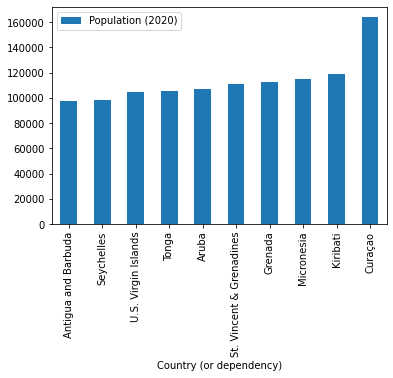

In [ ]:
# define the x axis and y axis: 
# since we want to see the populated countries, the two variables involved are:
# Country and Population. 

least_10.plot(x="Country (or dependency)", y="Population (2020)", kind='bar')

# # you can put a semi colon to avoid the "matplotlib.axes" tagline from appearing.
# least_10.plot(x="Country (or dependency)", y="Population (2020)", kind='bar');

**2. What are the top 10 populated countries?**

- Using the same plot above, we will be:
`setting the plot size`, `changing the bars colour`, `naming the x and y axes` and `naming the title`.

---



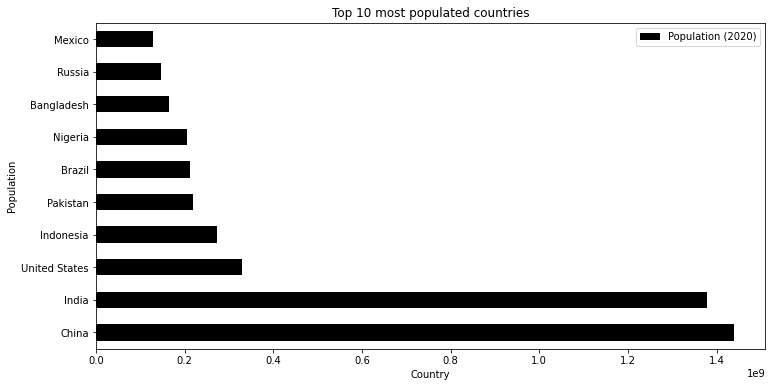

In [ ]:
top_10.plot(x="Country (or dependency)", y='Population (2020)', kind='barh', rot=0, color='k');

plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Top 10 most populated countries")

#                        (w, h)
plt.gcf().set_size_inches(12, 6)

__Let's take a general overview of the world's population distribution__

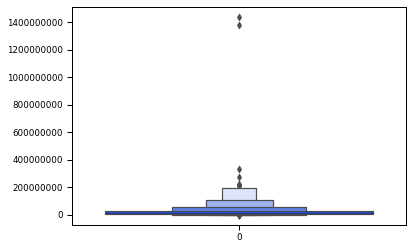

In [ ]:
sns.boxenplot(data=worldData["Population (2020)"])
plt.ticklabel_format(style='plain', axis='y') # to view the y values in their appropriate numeric scale

**Deduction:**

**3. What are the 10 countries with the most positive yearly change? Perhaps there are low fertility rate and high migration rate.**


- We could also work with barplot here. But this time let's try **Seaborn**



In [ ]:
posYearlyChange = worldData.sort_values(by="Yearly Change", ascending=False).head(10)
posYearlyChange  

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
55,Niger,24014064,3.84,895929,19,1266700,4000.0,7.0,15,17,0.31
151,Bahrain,1688629,3.68,60403,2239,760,47800.0,2.0,32,89,0.02
152,Equatorial Guinea,1392950,3.47,46999,50,28050,16000.0,4.6,22,73,0.02
30,Uganda,45427637,3.32,1471413,229,199810,168694.0,5.0,17,26,0.59
43,Angola,32644783,3.27,1040977,26,1246700,6413.0,5.6,17,67,0.42
15,DR Congo,88972681,3.19,2770836,40,2267050,23861.0,6.0,17,46,1.15
77,Burundi,11814346,3.12,360204,463,25680,2001.0,5.5,17,14,0.15
59,Mali,20125282,3.02,592802,17,1220190,-40000.0,5.9,16,44,0.26
71,Chad,16324440,3.00,478988,13,1259200,2000.0,5.8,17,23,0.21
23,Tanzania,59368313,2.98,1728755,67,885800,-40076.0,4.9,18,37,0.77


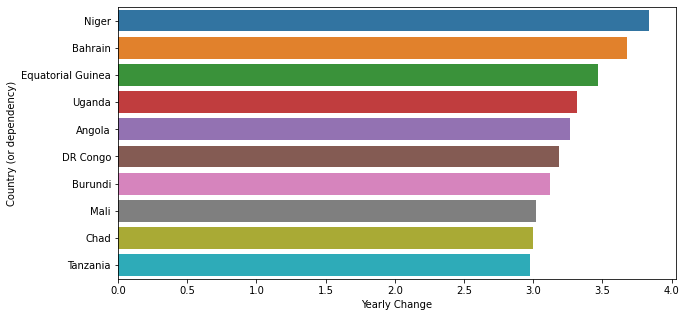

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Yearly Change', y='Country (or dependency)', data=posYearlyChange);

*__You may observe that countries with the highest yearly change aren't necessarily the most populated.__*

**Why?**



**4. What are the 10 countries with the most negative yearly change? Perhaps there are low fertility rate and high migration rate.**



In [ ]:
negYearlyChange = worldData.sort_values(by="Yearly Change", ascending=True).head(10)

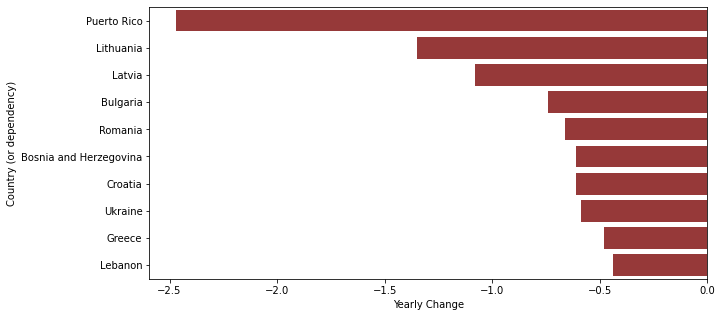

In [ ]:
plt.figure(figsize=(10, 5)) # set the figure size
sns.barplot(x='Yearly Change', y='Country (or dependency)', data=negYearlyChange, color='brown')

**Deduction:**

It could be more important to understand the causes or influencing feature(s) to the countries with the most negative and postive yearly change values.

- Let's consider the `Fertility` and `Migration` rates for countries in negYearlyChange and posYearlyChange so as to make a deduction

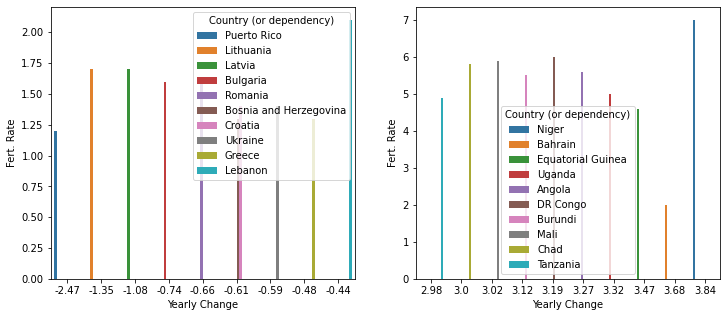

In [ ]:
# Fertility
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1) # 1 row, 2 column and first plot
sns.barplot(x='Yearly Change', y='Fert. Rate', hue=negYearlyChange['Country (or dependency)'], data=negYearlyChange)

plt.subplot(1,2,2) # 1 row, 2 column and second plot
sns.barplot(x='Yearly Change', y='Fert. Rate', hue=posYearlyChange['Country (or dependency)'], data=posYearlyChange);

**Deduction:**

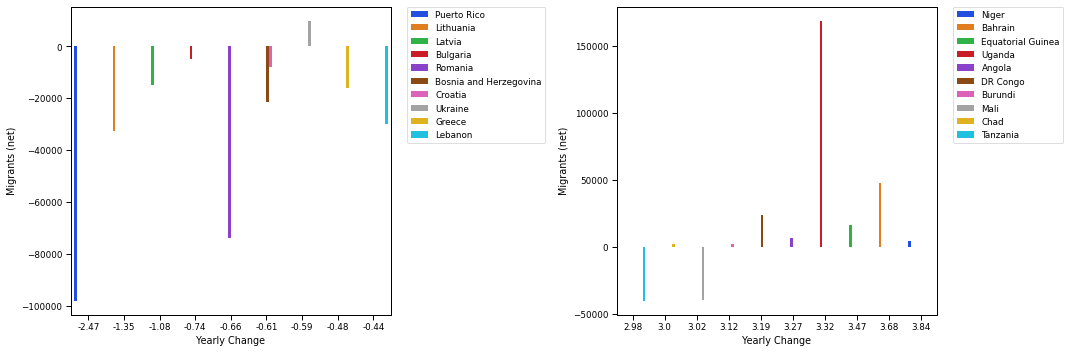

In [ ]:
# Migration
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1) # 1 row, 2 column and first plot
sns.barplot(x='Yearly Change', y='Migrants (net)', hue=negYearlyChange['Country (or dependency)'], data=negYearlyChange)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # to set the legends outside the plot

plt.subplot(1,2,2) # 1 row, 2 column and second plot
sns.barplot(x='Yearly Change', y='Migrants (net)', hue=posYearlyChange['Country (or dependency)'], data=posYearlyChange)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # to set the legends outside the plot

plt.tight_layout()
plt.show()

**Deduction:**

In [ ]:
# show the correlation between fetility rate and Migrants Net to Yearly Change

worldData.corr()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Population (2020),1.000000,-0.034384,0.849833,-0.019316,0.448664,-0.266999,-0.049534,0.019547,-0.041090,0.999998
Yearly Change,-0.034384,1.000000,0.174701,-0.007345,-0.020819,-0.016159,0.823665,-0.842458,-0.331765,-0.034007
Net Change,0.849833,0.174701,1.000000,-0.027255,0.293923,-0.302188,0.166176,-0.192004,-0.168311,0.850168
Density (P/Km²),-0.019316,-0.007345,-0.027255,1.000000,-0.062558,0.000155,-0.152183,0.141902,-0.010780,-0.019162
Land Area (Km²),0.448664,-0.020819,0.293923,-0.062558,1.000000,0.225414,-0.045694,0.062868,0.132162,0.448530
Migrants (net),-0.266999,-0.016159,-0.302188,0.000155,0.225414,1.000000,-0.113249,0.190334,0.251852,-0.266912
Fert. Rate,-0.049534,0.823665,0.166176,-0.152183,-0.045694,-0.113249,1.000000,-0.882256,-0.474535,-0.049309
Med. Age,0.019547,-0.842458,-0.192004,0.141902,0.062868,0.190334,-0.882256,1.000000,0.518977,0.019282
Urban Pop %,-0.041090,-0.331765,-0.168311,-0.010780,0.132162,0.251852,-0.474535,0.518977,1.000000,-0.041130
World Share,0.999998,-0.034007,0.850168,-0.019162,0.448530,-0.266912,-0.049309,0.019282,-0.041130,1.000000


We can easily visualize the `worldData.corr()` in two ways:

- Displaying a heatmap
- Displaying their linear relationship

*__Question:__ What is a heatmap?*

In [ ]:
sns.heatmap(worldData.corr())

# # add more arguments to change the appearance of the map:

# sns.heatmap(worldData.corr(), mask=mask, annot=True, fmt=".2f", cmap='Blues',
#            vmin=-1, vmax=1, cbar_kws={"shrink": .8})

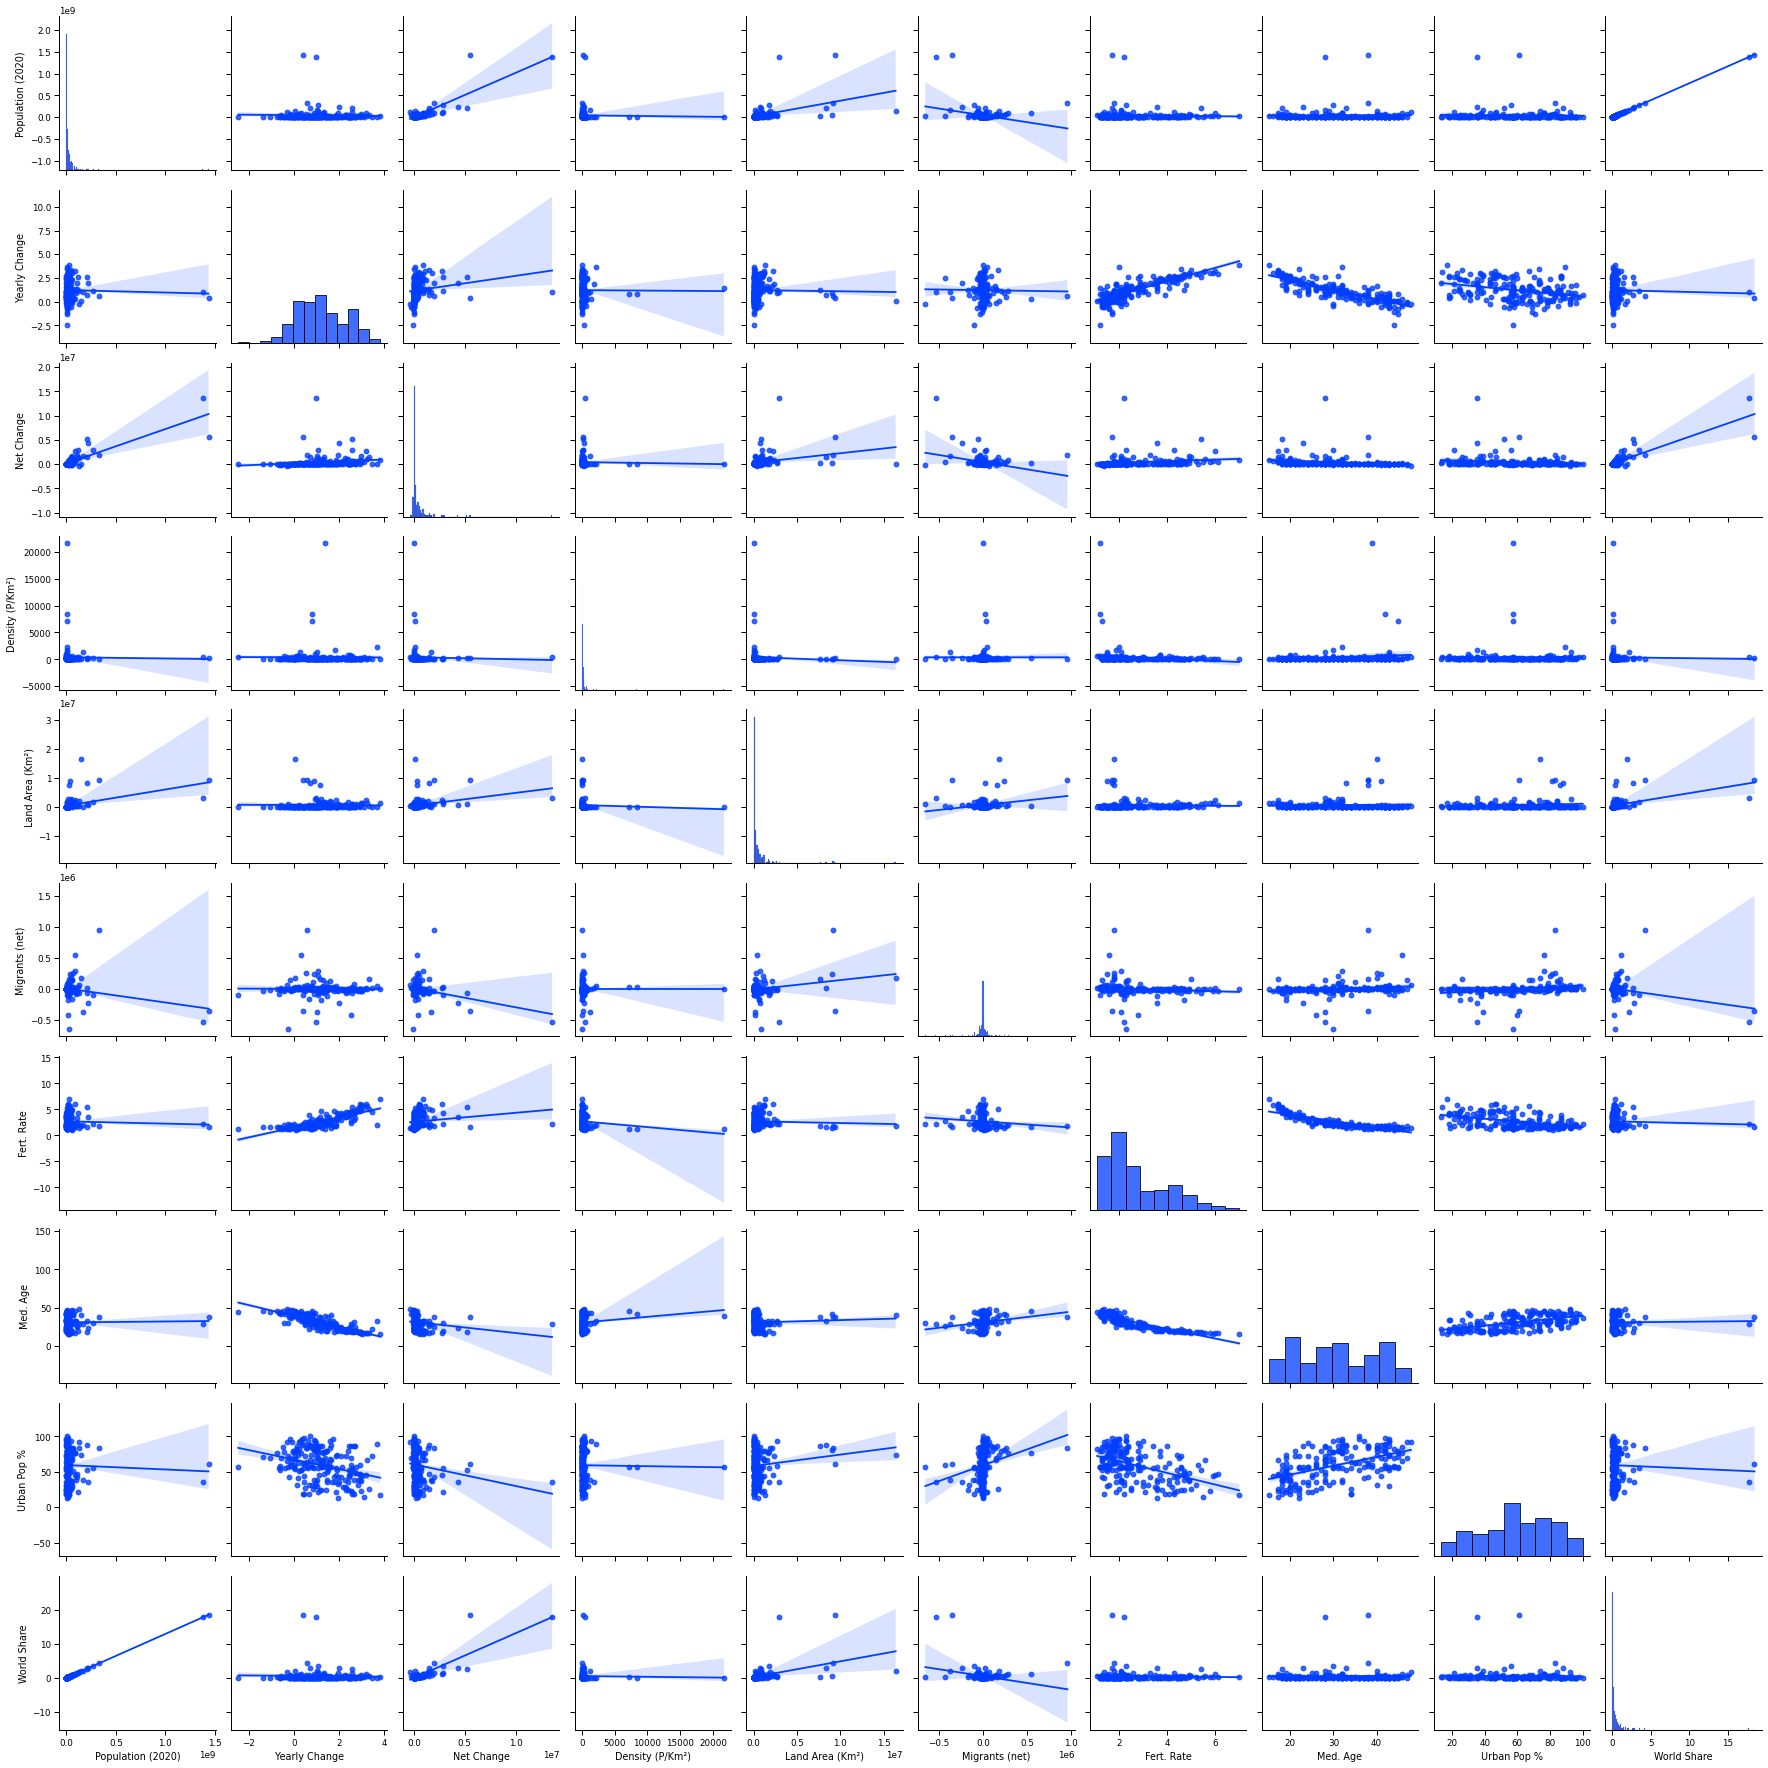

In [ ]:
# express the bivariant distributions in the dataset

sns.set_context('paper')
sns.set_palette('bright')
sns.pairplot(worldData, kind='reg');

__We need to take a closer look at the following relationships:__
1. Median Age and Yearly Change
2. Fertility Rate and Yearly Change
3. Median Age and Fertility Rate
4. Migrants (Net) and Fertility Change

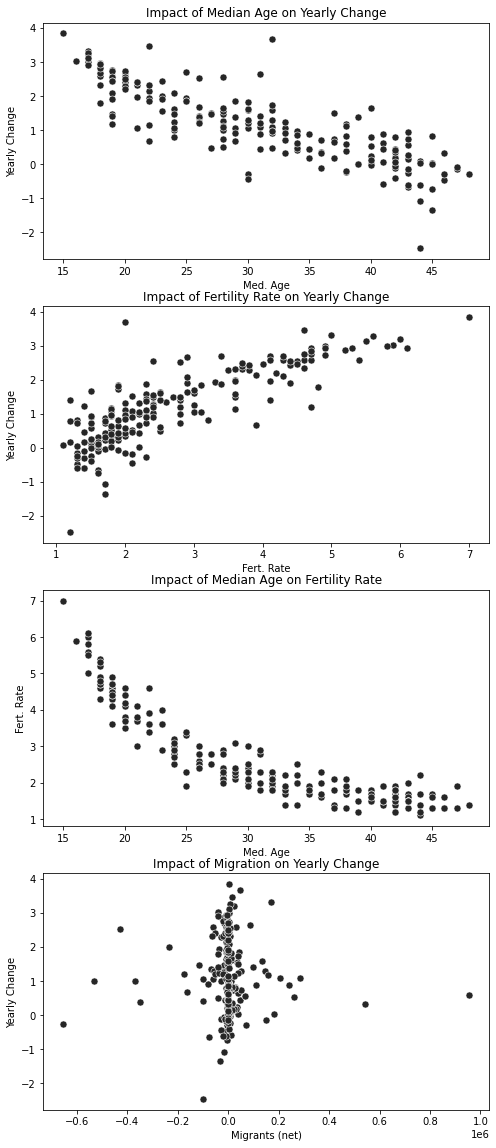

In [ ]:
plt.figure(figsize=(8,20))

plt.subplot(4,1,1)
sns.scatterplot(x="Med. Age", y="Yearly Change", s=50, color=".15", data=worldData)
plt.title("Impact of Median Age on Yearly Change")

plt.subplot(4,1,2)
sns.scatterplot(x="Fert. Rate", y="Yearly Change", s=50, color=".15", data=worldData)
plt.title("Impact of Fertility Rate on Yearly Change")

plt.subplot(4,1,3)
sns.scatterplot(x="Med. Age", y="Fert. Rate", s=50, color=".15", data=worldData)
plt.title("Impact of Median Age on Fertility Rate")

plt.subplot(4,1,4)
sns.scatterplot(x="Migrants (net)", y="Yearly Change", s=50, color=".15", data=worldData)
plt.title("Impact of Migration on Yearly Change")

plt.show(sns)

__`What age bracket exists most as countries Median Age.`__

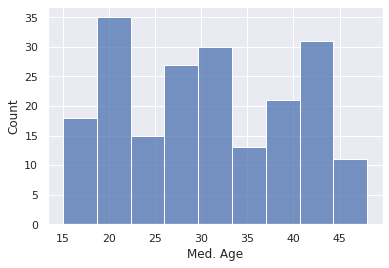

In [ ]:
# plotting Age Distribution
sns.set_theme(style="darkgrid")    # to change theme
sns.histplot(worldData["Med. Age"]);

plt.savefig('world_countries_median_age_(2020).png', dpi=300)    # save plot

__Deduction:__

`Check for the countries with the highest and least fertility rate, to gain insights on their Urban Population and Median Age - Perhaps countries with more rural population have low literacy level, therfore resulting to high birth rate.`

In [ ]:
# top 10 countries with the higest/lowest fertility rate
highFertRate = worldData.sort_values(by="Fert. Rate", ascending=False).head(10)
lowFertRate = worldData.sort_values(by="Fert. Rate", ascending=True).head(10)


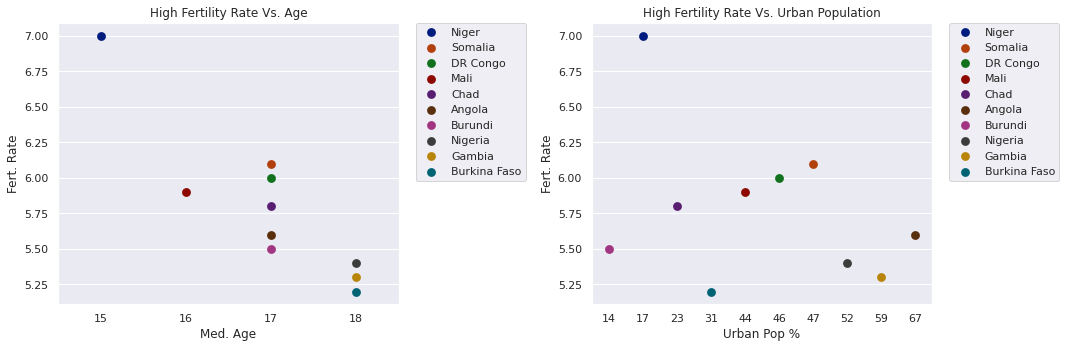

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1) # 1 row, 2 column and first plot
sns.pointplot(
    data=highFertRate,
    x="Med. Age", y="Fert. Rate",
    hue="Country (or dependency)",
    palette="dark"    
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("High Fertility Rate Vs. Age")

plt.subplot(1,2,2) # 1 row, 2 column and second plot
sns.pointplot(
    data=highFertRate,
    x="Urban Pop %", y="Fert. Rate",
    hue="Country (or dependency)",
    palette="dark"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("High Fertility Rate Vs. Urban Population")

plt.tight_layout()
plt.show()

**Deduction:**
Countries with low urban population have higher fertility rate. The countries are:
- Burundi, **Niger**, Chad, Mali, Dr Congo, Samalia; showing their high rural population, and we could say these countries has high poverty rate.

Let's check for the Net Migration Rate in these countries, and their Population Density too.



In [ ]:
highFertRate.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

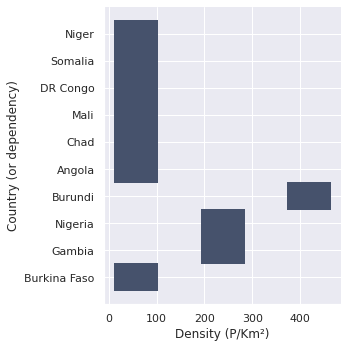

In [ ]:
sns.displot(x=highFertRate["Density (P/Km²)"], y=highFertRate["Country (or dependency)"]);
plt.ticklabel_format(style='plain', axis='x')

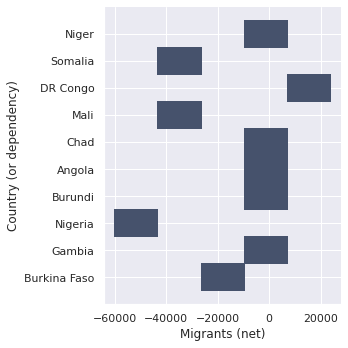

In [ ]:
sns.displot(x=highFertRate["Migrants (net)"], y=highFertRate["Country (or dependency)"]);
plt.ticklabel_format(style='plain', axis='x')

**Deduction:**
- Nigeria has the highest emmigration rate compared to the other countries.
- Niger, which has the highest rural population and fertility rate, has 0 net migration rate. This could be due to the level of illitracy there, as the populance may have no reasons to migrate
- Dr Congo has the highest immigration rate even though 54% of it's population are rural settlers.

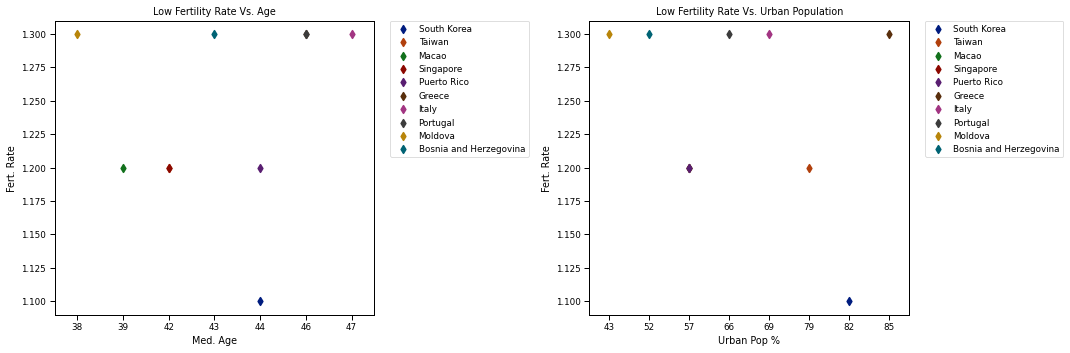

In [ ]:
# Countries with low fertility rate
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) # 1 row, 2 column and first plot
sns.pointplot(
    data=lowFertRate,
    x="Med. Age", y="Fert. Rate",
    hue="Country (or dependency)",
    join=False, palette="dark",
    markers="d", scale=1, ci=None
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Low Fertility Rate Vs. Age")

plt.subplot(1,2,2) # 1 row, 2 column and second plot
sns.pointplot(
    data=lowFertRate,
    x="Urban Pop %", y="Fert. Rate",
    hue="Country (or dependency)",
    join=False, palette="dark",
    markers="d", scale=1, ci=None
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Low Fertility Rate Vs. Urban Population")

plt.tight_layout()
plt.show(sns)

**Deduction:**

Compare the Population Density to the Land Area.

In [ ]:
worldData.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

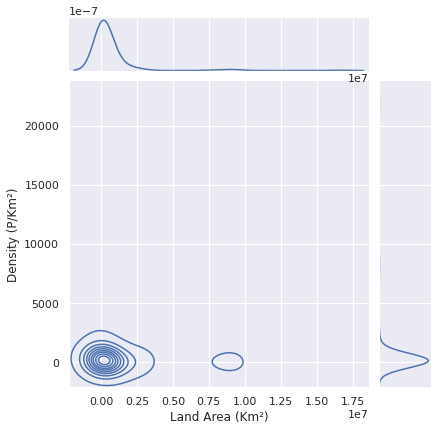

In [ ]:
sns.jointplot(
    x="Land Area (Km²)", y="Density (P/Km²)",
   data=worldData, kind="kde" 
)

plt.ticklabel_format(style='plain', axis='x')
plt.show(sns)

## Class Work

Is there a similarity between countries with high fertility rate and countries in either the `top_10` or `posYearlyChange`?

Use data visualization to back up your response.